In [1]:
import polars as pl

In [5]:
filtered_df = df.filter(df['reactivity_0027'].is_not_null())
len(filtered_df)

335616

In [ ]:
from dataset import BPPInputDataset

ds = BPPInputDataset()

In [9]:
df = pl.read_csv("./data/test_sequences.csv")

In [10]:
df.head()

id_min,id_max,sequence_id,sequence,future
i64,i64,str,str,i64
0,176,"""eee73c1836bc""","""GGGAACGACUCGAG…",0
177,353,"""d2a929af7a97""","""GGGAACGACUCGAG…",0
354,530,"""d39a4425ff45""","""GGGAACGACUCGAG…",0
531,707,"""1fc41e92d553""","""GGGAACGACUCGAG…",0
708,884,"""1d0826fb892f""","""GGGAACGACUCGAG…",0


In [20]:
len(df.row(0)[-2])

177

# HDHHDHDHD

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
train = []
val = []
with open("./epoch.csv", 'r') as file:
    for line in file:
        if not line.strip():
            break
        line = line.split(',')
        train.append(float(line[0]))
        val.append(float(line[1]))

train, val = np.array(train), np.array(val)

tra_wc, tra_no_wc, tra_2wc = train[:40], train[40:80], train[80:120]
val_wc, val_no_wc, val_2wc = val[:40], val[40:80], val[80:120]

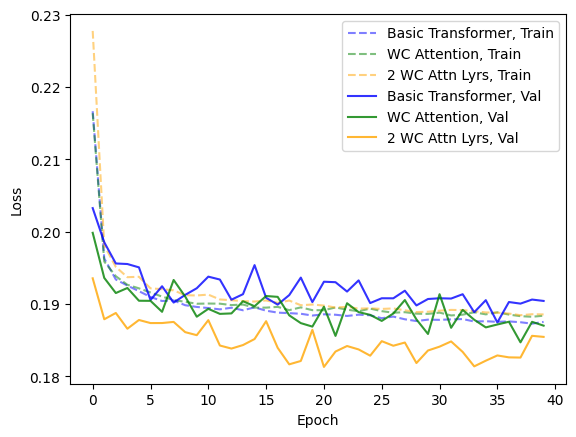

In [21]:

plt.plot(tra_wc, c="blue", linestyle='dashed', alpha=0.5, label="Basic Transformer, Train")
plt.plot(tra_no_wc, c="green", linestyle='dashed', alpha=0.5, label="All WC Attn Lyrs, Train")
plt.plot(tra_2wc, c="orange", linestyle='dashed', alpha=0.5, label="2 WC Attn Lyrs, Train")

plt.plot(val_wc, c="blue", alpha=0.8, label="Basic Transformer, Val")
plt.plot(val_no_wc, c="green", alpha=0.8, label="All WC Attn Lyrs, Val")
plt.plot(val_2wc, c="orange", alpha=0.8, label="2 WC Attn Lyrs, Val")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.savefig('my_plot.png')